In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# importing data from kaggle
!kaggle datasets download -d jangedoo/utkface-new

 99% 329M/331M [00:02<00:00, 156MB/s]
100% 331M/331M [00:02<00:00, 131MB/s]


In [3]:
# importing libraries and unzipping the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile
import os

In [4]:
zip_ref = zipfile.ZipFile('/content/utkface-new.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/UTKFace'

In [6]:
# Extracting lables
age_label = []
gender_label = []
image_path = []

for i in os.listdir(base_dir):
  path = os.path.join(base_dir,i)
  temp = i.split('_')
  age = int(temp[0])
  gender = int(temp[1])
  age_label.append(age)
  gender_label.append(gender)
  image_path.append(path)

In [7]:
# converting into dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_label, gender_label
df.head()

,image,age,gender
0,/content/UTKFace/26_0_1_20170113133259775.jpg....,26,0
1,/content/UTKFace/23_0_4_20170103234915411.jpg....,23,0
2,/content/UTKFace/26_1_0_20170116184526152.jpg....,26,1
3,/content/UTKFace/50_0_0_20170119205549384.jpg....,50,0
4,/content/UTKFace/40_0_1_20170117182715021.jpg....,40,0


In [8]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

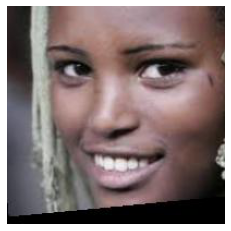

In [9]:
from PIL import Image
img = Image.open(df['image'][20])
plt.axis('off')
plt.imshow(img);

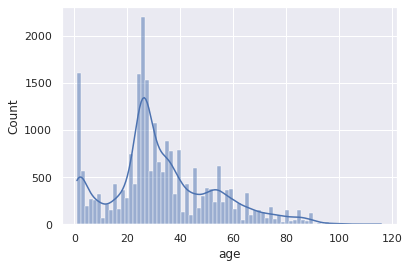

In [10]:
# checking the distribution of age
sns.histplot(df['age'],kde=True)
plt.show()

<Axes: >

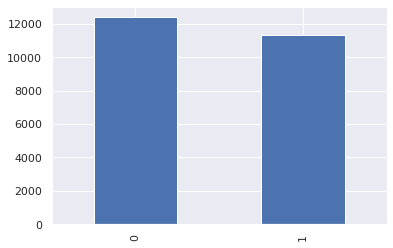

In [11]:
df['gender'].value_counts().plot(kind = 'bar')

In [12]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

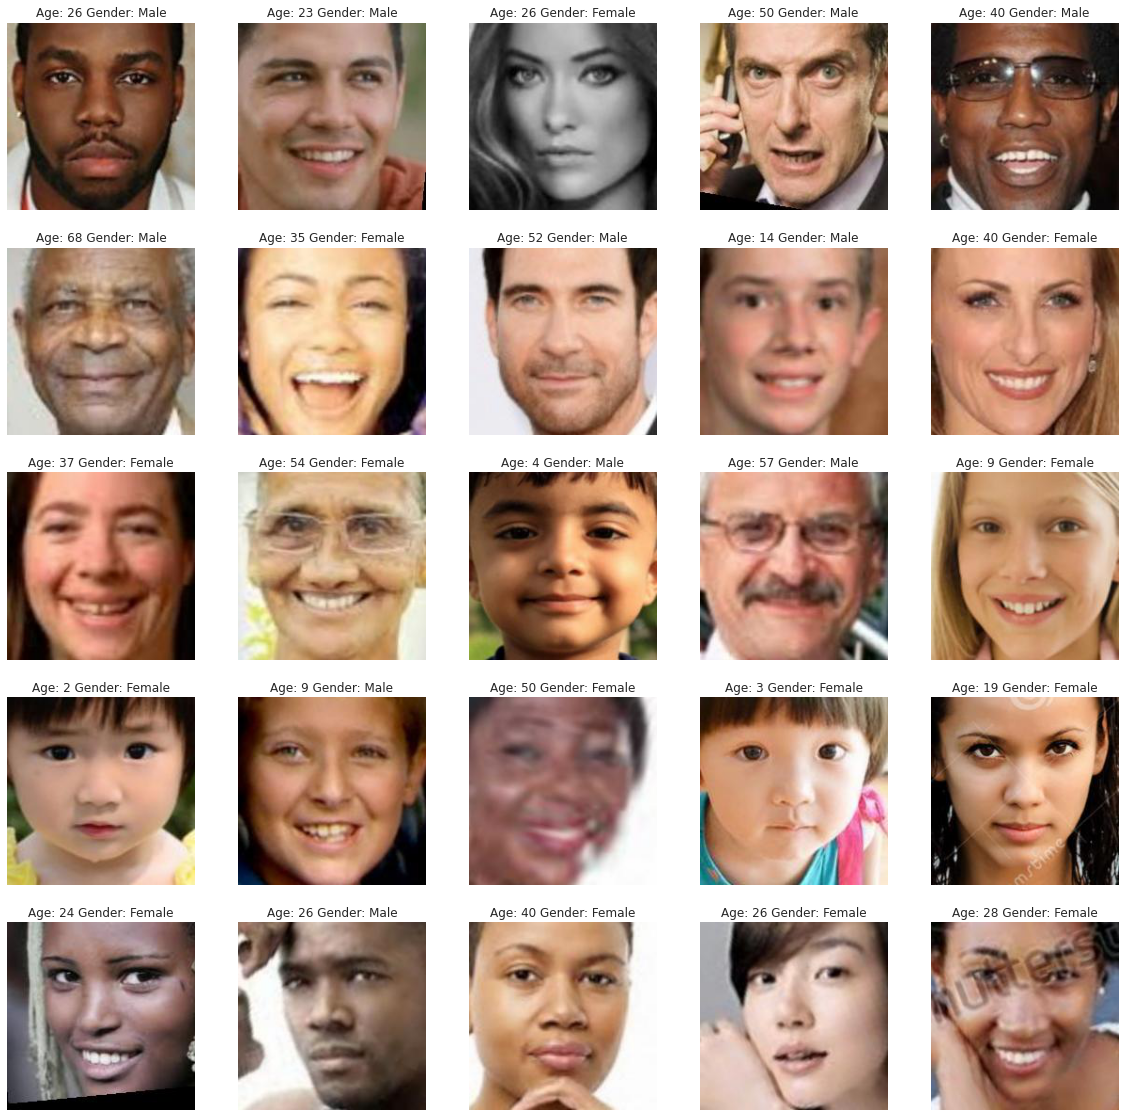

In [13]:
# to display grid of images
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = tf.keras.utils.load_img(file) #Loads an image into PIL format
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [20]:
# making a fuction to extract the features

def extract_features (image):
  features = []
  for i in image:
    img = tf.keras.utils.load_img(i,grayscale=True)
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.array(img)
    features.append(img)

  features = np.array(features)
  # ignore this step if using RGB
  features = features.reshape(len(features), 128, 128, 1)
  return features

In [21]:
x = extract_features(df['image'])

In [22]:
x.shape

(23708, 128, 128, 1)

In [23]:
# normalize the images
X  = x/255.0

In [24]:
# target variable
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [25]:
input_shape = (128, 128, 1)

In [33]:
# Model Creation
inputs = Input((input_shape))
# convolutional layers

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.2) (dense_1)
dropout_2 = Dropout(0.2) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])


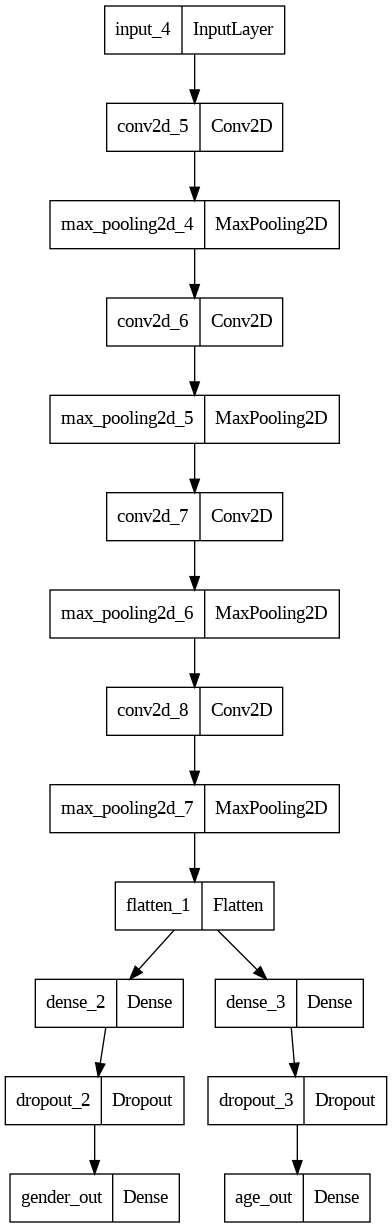

In [34]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [35]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
593/593 [==============================] - 17s 22ms/step - loss: 15.7306 - gender_out_loss: 0.6816 - age_out_loss: 15.0490 - gender_out_accuracy: 0.5596 - age_out_accuracy: 0.0469 - val_loss: 12.4021 - val_gender_out_loss: 0.5389 - val_age_out_loss: 11.8633 - val_gender_out_accuracy: 0.7273 - val_age_out_accuracy: 0.0485
Epoch 2/20
593/593 [==============================] - 12s 20ms/step - loss: 11.4570 - gender_out_loss: 0.5023 - age_out_loss: 10.9547 - gender_out_accuracy: 0.7577 - age_out_accuracy: 0.0288 - val_loss: 9.4479 - val_gender_out_loss: 0.4269 - val_age_out_loss: 9.0210 - val_gender_out_accuracy: 0.7908 - val_age_out_accuracy: 0.0127
Epoch 3/20
593/593 [==============================] - 11s 19ms/step - loss: 9.4335 - gender_out_loss: 0.4145 - age_out_loss: 9.0190 - gender_out_accuracy: 0.8070 - age_out_accuracy: 0.0129 - val_loss: 8.5980 - val_gender_out_loss: 0.3839 - val_age_out_loss: 8.2142 - val_gender_out_accuracy: 0.8201 - val_age_out_accuracy: 0.0112
Epoc

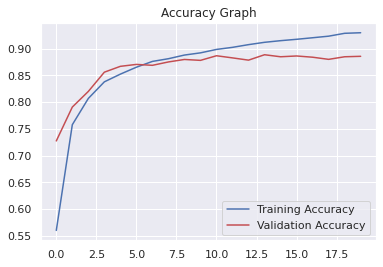

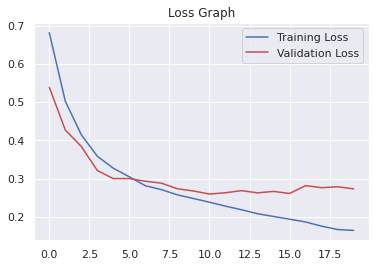

In [36]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

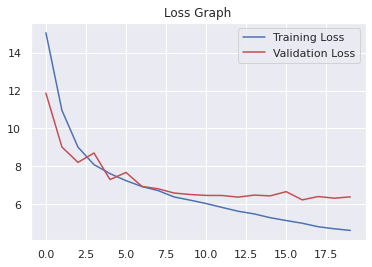

In [37]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 34
1/1 [==============================] - 0s 369ms/step
Predicted Gender: Female Predicted Age: 32


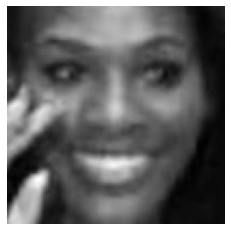

In [38]:
# Test the model

image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 27
1/1 [==============================] - 0s 34ms/step
Predicted Gender: Male Predicted Age: 27


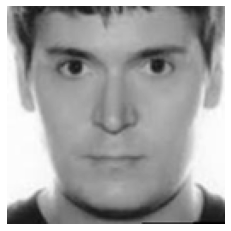

In [39]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 20
1/1 [==============================] - 0s 37ms/step
Predicted Gender: Male Predicted Age: 20


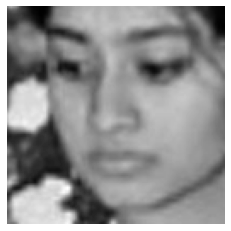

In [42]:
image_index = 900
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');